In [39]:
path = '/home/marciobrener/Documentos/MachineLearning/arquivos_csv/'

In [40]:
import numpy as np
import pandas as pd

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Regressão

In [44]:
df_estoque_DPF = pd.read_csv(path + 'EstoqueDPF.csv',sep=';')

In [45]:
df_estoque_DPF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149980 entries, 0 to 149979
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Titulo/Contrato                149980 non-null  object
 1   Vencimento do Titulo/Contrato  149980 non-null  object
 2   Valor do Estoque               149980 non-null  object
 3   Quantidade do Estoque          149980 non-null  object
 4   Mes do Estoque                 149980 non-null  object
 5   Classe da Carteira             149980 non-null  object
 6   Tipo de Divida                 149980 non-null  object
dtypes: object(7)
memory usage: 8.0+ MB


In [51]:
df_estoque_DPF.tail()

,Titulo/Contrato,Vencimento do Titulo/Contrato,Valor do Estoque,Quantidade do Estoque,Mes do Estoque,Classe da Carteira,Tipo de Divida
149975,TDAD12D231,01/04/2020,1.947137e+06,19313.0,12/2018,Mercado,Dívida Interna
149976,Global 2045,27/01/2045,1.378962e+10,3550000.0,12/2018,Mercado,Dívida Externa
149977,TDAD13F238,01/06/2028,3.973436e+05,3958.0,12/2018,Mercado,Dívida Interna
149978,TDAD13G237,01/07/2027,3.295264e+04,329.0,12/2018,Mercado,Dívida Interna
149979,TDAD12D233,01/04/2022,1.947523e+06,19313.0,12/2018,Mercado,Dívida Interna


## Selecionando apenas valores númericos

In [47]:
colunas_numericas = ['Valor do Estoque', 'Quantidade do Estoque']
for coluna in colunas_numericas:
    df_estoque_DPF[coluna] = pd.to_numeric(df_estoque_DPF[coluna].str.replace(',', '.'), errors='coerce')


In [48]:
df_numerico = df_estoque_DPF.select_dtypes(include=['float64', 'int64'])

# Correção 

In [49]:
correlacao = df_numerico.corr()
print(correlacao)

                       Valor do Estoque  Quantidade do Estoque
Valor do Estoque               1.000000               0.367146
Quantidade do Estoque          0.367146               1.000000


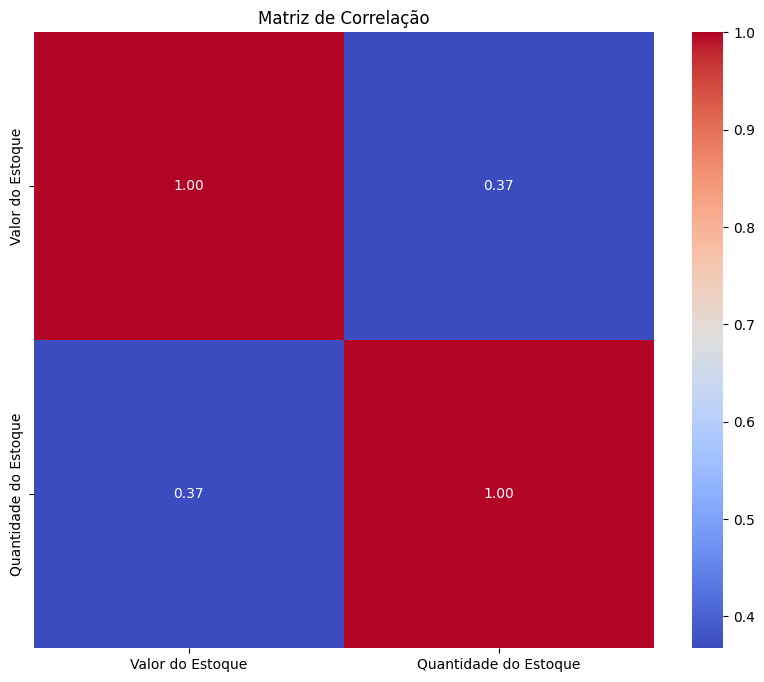

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()